# Abgabe 6

In [3]:
import numpy as np
import os
from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [4]:
#load images
images = []
for file in os.listdir('.'):
    if file.endswith(('.jpg', '.png')):
        img = io.imread(file)
        images.append(img)

2. morphologische Operationen - Erode und Dilate

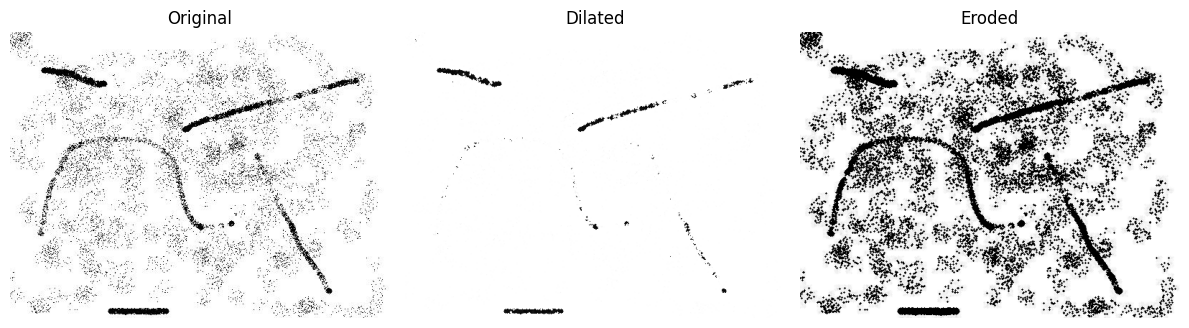

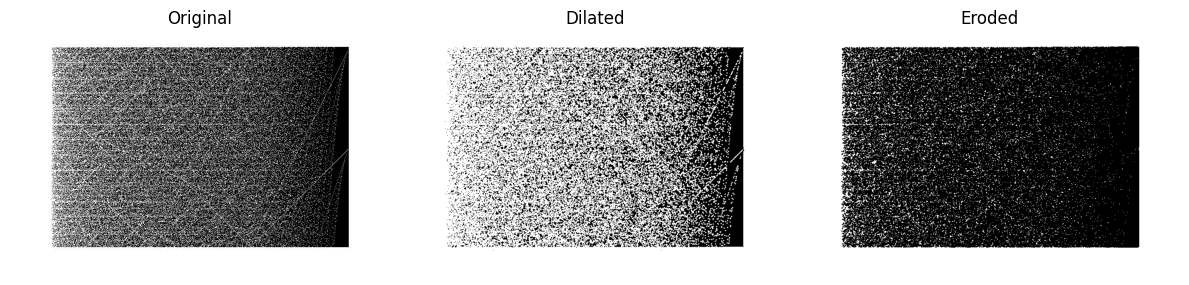

In [5]:
# values 0.0 - 1.0 or 0 - 255 
def invert(img):
    return 1.0 - img if img.max() <= 1.0 else 255 - img 


def dilate(in_image, filter, iter_num):
    img = in_image.astype(np.float32)
    h, w = img.shape
    filter_h, filter_w =  filter.shape

    ic = (filter_h - 1) // 2
    jc =  (filter_w - 1) // 2

    for _ in range(iter_num):
        result = np.zeros_like(img)

        for j in range(filter_h): 
            for i in range(filter_w):
                if filter[j][i] == 1: #pixel is set
                    dx = i - ic #horizontal shift
                    dy = j - jc #vertical shift

                    for y in range(h):
                        for x in range(w):
                            ny = y + dy
                            nx = x + dx
                            if 0 <= ny < h and 0 <= nx < w:
                                if img[ny, nx] > result[y, x]:
                                    result[y, x] = img[ny, nx] #max grey value 
        
        img = result.copy()
    return img.astype(np.uint8)


def erode(in_image, filter, iter_num):
    inverted = invert(in_image)
    dilated = dilate(inverted, filter, iter_num) #dilates the background
    result = invert(dilated)
    return result.astype(np.uint8)

#test
filter = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.float32)

gray_image = rgb2gray(images[2])

dilated = dilate(images[1], filter, iter_num=1)
eroded = erode(images[1], filter, iter_num=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(images[1], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Dilated")
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Eroded")
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.tight_layout()


gray_image = rgb2gray(images[2])
dilated = dilate(gray_image, filter, iter_num=1)
eroded = erode(gray_image, filter, iter_num=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(images[2], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Dilated")
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Eroded")
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.show()


3. Experiment mit Strukturelementen

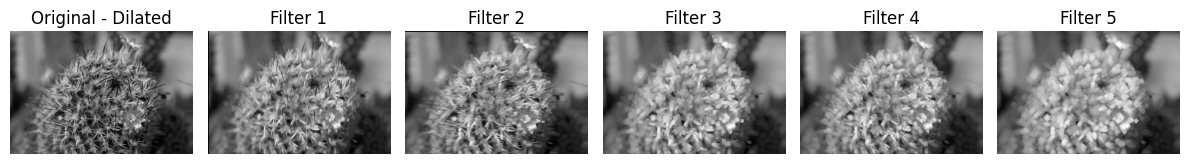

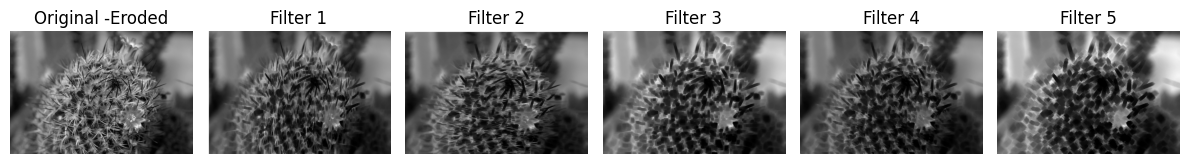

In [7]:
filter1 = np.array([[1],
                  [1],
                  [1]], dtype=np.uint8)

filter2 = np.ones((1, 3), dtype=np.uint8)

filter3 = np.array([[1, 0, 1],
                    [0, 1, 0],
                    [1, 0, 1]], dtype=np.uint8)

filter4 = np.array([[1, 0, 0],
                    [1, 0, 0],
                    [1, 1, 1]], dtype=np.uint8)

filter5 = np.array([[0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0],
                    [1, 1, 1, 1, 1],
                    [0, 0, 1, 0, 0],
                    [0, 0, 1, 0, 0]], dtype=np.uint8)


dilated1 = dilate(images[0], filter1, iter_num=3)
eroded1 = erode(images[0], filter1, iter_num=3)

dilated2 = dilate(images[0], filter2, iter_num=3)
eroded2 = erode(images[0], filter2, iter_num=3)

dilated3 = dilate(images[0], filter3, iter_num=3)
eroded3 = erode(images[0], filter3, iter_num=3)

dilated4 = dilate(images[0], filter4, iter_num=3)
eroded4 = erode(images[0], filter4, iter_num=3)

dilated5 = dilate(images[0], filter5, iter_num=3)
eroded5 = erode(images[0], filter5, iter_num=3)

plt.figure(figsize=(12, 4))

plt.subplot(1, 6, 1)
plt.title("Original - Dilated")
plt.imshow(images[0], cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.title("Filter 1")
plt.imshow(dilated1, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.title("Filter 2")
plt.imshow(dilated2, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.title("Filter 3")
plt.imshow(dilated3, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.title("Filter 4")
plt.imshow(dilated4, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.title("Filter 5")
plt.imshow(dilated5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 6, 1)
plt.title("Original -Eroded")
plt.imshow(images[0], cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.title("Filter 1")
plt.imshow(eroded1, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.title("Filter 2")
plt.imshow(eroded2, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.title("Filter 3")
plt.imshow(eroded3, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.title("Filter 4")
plt.imshow(eroded4, cmap='gray')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.title("Filter 5")
plt.imshow(eroded5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

**Auswertung**:

- Je höher iter_num, desto deutlicher sind die Auswirkungen der Filter auf das Bild sichtbar -> Ausdehnung oder Schrumpfung
- Größere Filter führen zu stärkerer Veränderung
- Filterform bestimmt, welche Bildbereiche bevorzugt beeinflusst werden --> Richtung